In [25]:
import pandas as pd

# Load the YAbalone dataset with the path
file_path = 'YAbalone.csv' # Current directory
abalone_data = pd.read_csv(file_path)

# To calculate mean and standard deviation of 7 numerical attributes in the YAbalone dataset
numerical_columns = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

# Using agg function of pandas to calculate mean and standard deviation
abalone_data[numerical_columns].agg(['mean', 'std'])

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203


In [26]:
import pandas as pd

# Load the YAbalone dataset with the path
file_path = 'YAbalone.csv' # Current directory
abalone_data = pd.read_csv(file_path)

# Covariance matrix for Length, Diameter, Shucked_weight, and Rings
abalone_data[['Length', 'Diameter', 'Shucked_weight', 'Rings']].cov()

,Length,Diameter,Shucked_weight,Rings
Length,0.014422,0.011761,0.023935,0.215562
Diameter,0.011761,0.009849,0.019674,0.183872
Shucked_weight,0.023935,0.019674,0.049268,0.301204
Rings,0.215562,0.183872,0.301204,10.395266


In [27]:
import pandas as pd

# Load the YAbalone dataset with the path
file_path = 'YAbalone.csv' # Current directory
abalone_data = pd.read_csv(file_path)

# Correlation matrix for Length, Diameter, Shucked_weight, and Rings
abalone_data[['Length', 'Diameter', 'Shucked_weight', 'Rings']].corr()

,Length,Diameter,Shucked_weight,Rings
Length,1.000000,0.986812,0.897914,0.556720
Diameter,0.986812,1.000000,0.893162,0.574660
Shucked_weight,0.897914,0.893162,1.000000,0.420884
Rings,0.556720,0.574660,0.420884,1.000000


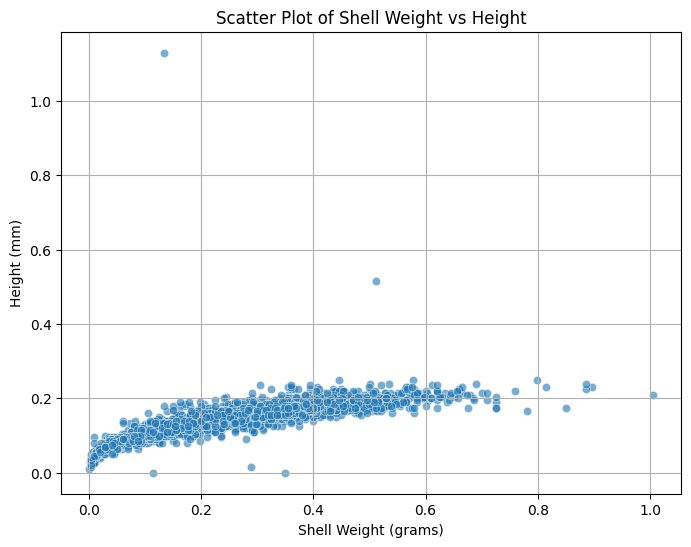

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the YAbalone dataset with the path
file_path = 'YAbalone.csv' # Current directory
abalone_data = pd.read_csv(file_path)

# Scatter plot for Shell_weight vs Height
plt.figure(figsize=(8,6))
sns.scatterplot(x='Shell_weight', y='Height', data=abalone_data, alpha=0.6)

# Display the plot with title and labels
plt.title("Scatter Plot of Shell Weight vs Height")
plt.xlabel("Shell Weight (grams)")
plt.ylabel("Height (mm)")
plt.grid(True)
plt.show()


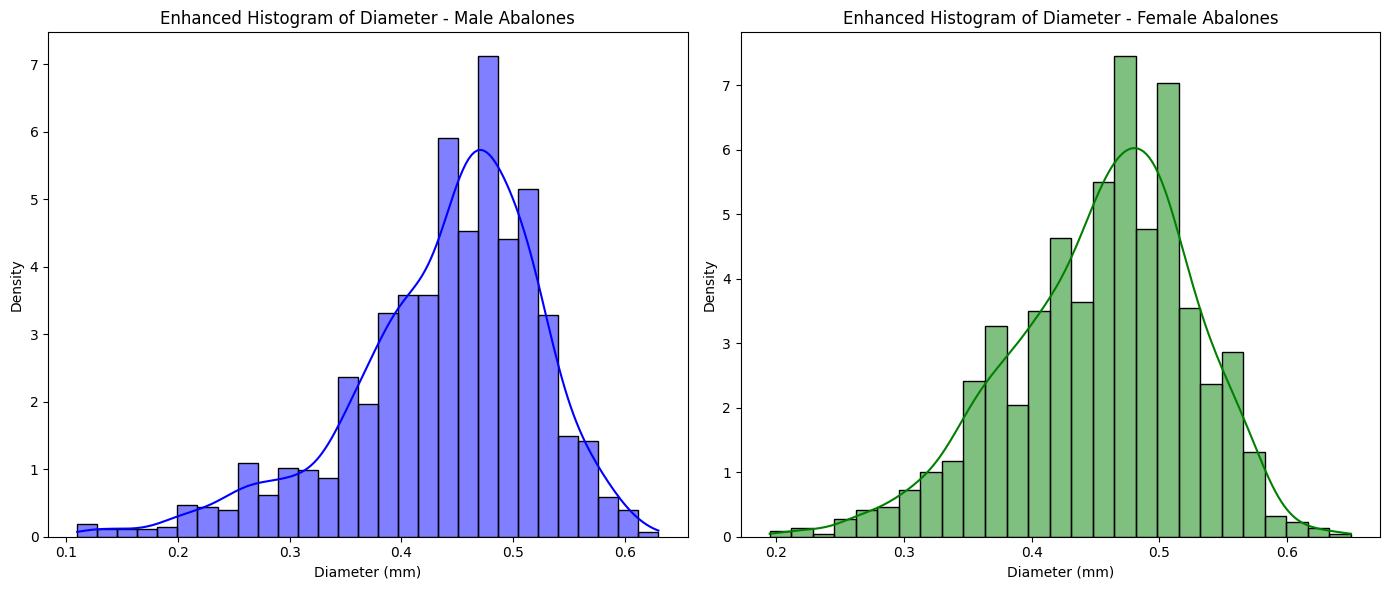

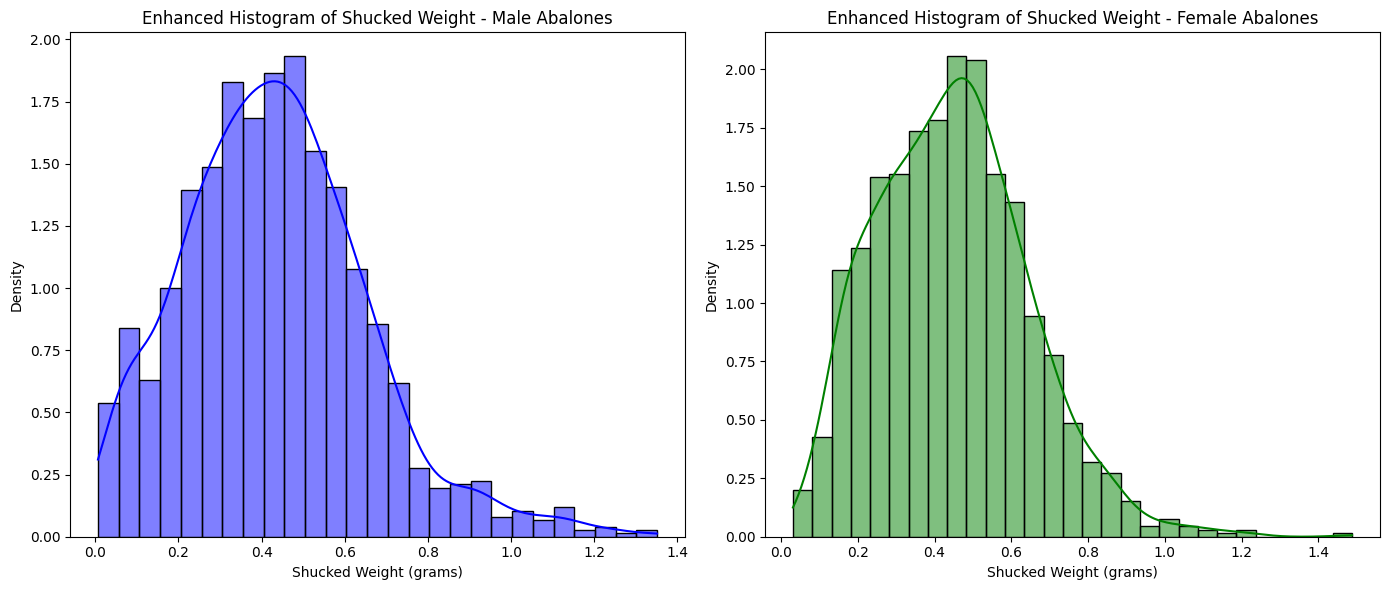

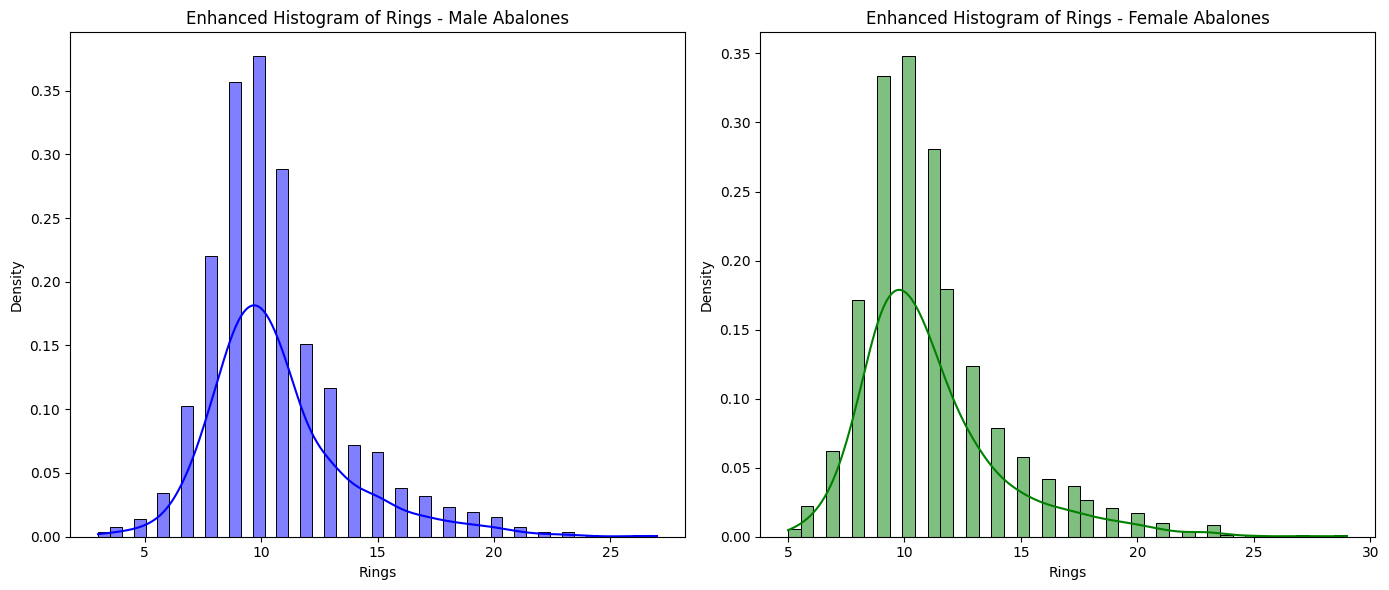

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the YAbalone dataset with the path
file_path = 'YAbalone.csv' # Current directory
abalone_data = pd.read_csv(file_path)

# Splitting data
abalone_male = abalone_data[abalone_data['Sex'] == 'M']
abalone_female = abalone_data[abalone_data['Sex'] == 'F']

# Plotting the histograms
def plot_histograms(attribute, title, xlabel):
    plt.figure(figsize=(14, 6))

    # Plot for Males
    plt.subplot(1, 2, 1)
    sns.histplot(abalone_male[attribute], kde=True, color='blue', stat='density', common_norm=False)
    plt.title(f"{title} - Male Abalones")
    plt.xlabel(xlabel)
    plt.ylabel("Density")

    # Plot for Females
    plt.subplot(1, 2, 2)
    sns.histplot(abalone_female[attribute], kde=True, color='green', stat='density', common_norm=False)
    plt.title(f"{title} - Female Abalones")
    plt.xlabel(xlabel)
    plt.ylabel("Density")

    plt.tight_layout()
    plt.show()

# Plotting for Diameter, Shucked_weight and Rings
plot_histograms('Diameter', 'Enhanced Histogram of Diameter', 'Diameter (mm)')
plot_histograms('Shucked_weight', 'Enhanced Histogram of Shucked Weight', 'Shucked Weight (grams)')
plot_histograms('Rings', 'Enhanced Histogram of Rings', 'Rings')


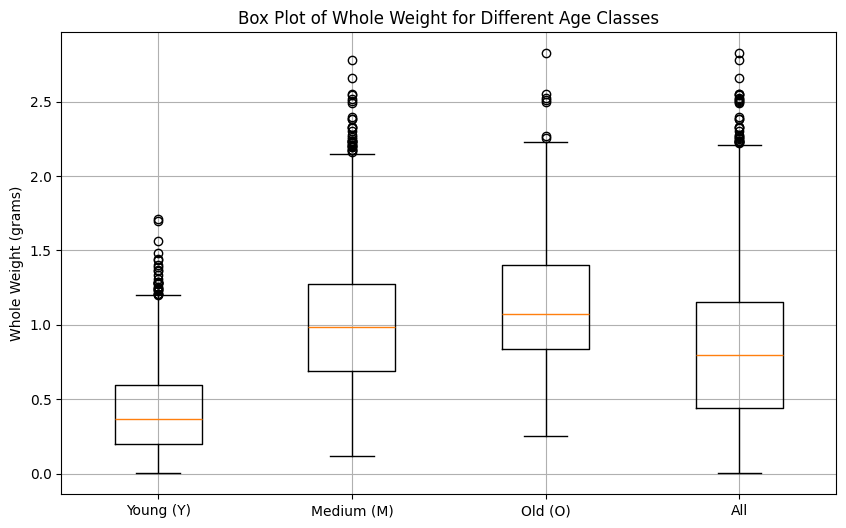

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the YAbalone dataset with the path
file_path = 'YAbalone.csv' # Current directory
abalone_data = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))

# Age Column changed to category
abalone_data['Age'] = abalone_data['Age'].astype('category')

# Box plot for Whole_weight age classes Y, M, O and everything
plt.boxplot([abalone_data[abalone_data['Age'] == 'Y']['Whole_weight'],
             abalone_data[abalone_data['Age'] == 'M']['Whole_weight'],
             abalone_data[abalone_data['Age'] == 'O']['Whole_weight'],
             abalone_data['Whole_weight']],
            labels=['Young (Y)', 'Medium (M)', 'Old (O)', 'All'])

# Add title and labels
plt.title("Box Plot of Whole Weight for Different Age Classes")
plt.ylabel("Whole Weight (grams)")
plt.grid(True)
plt.show()


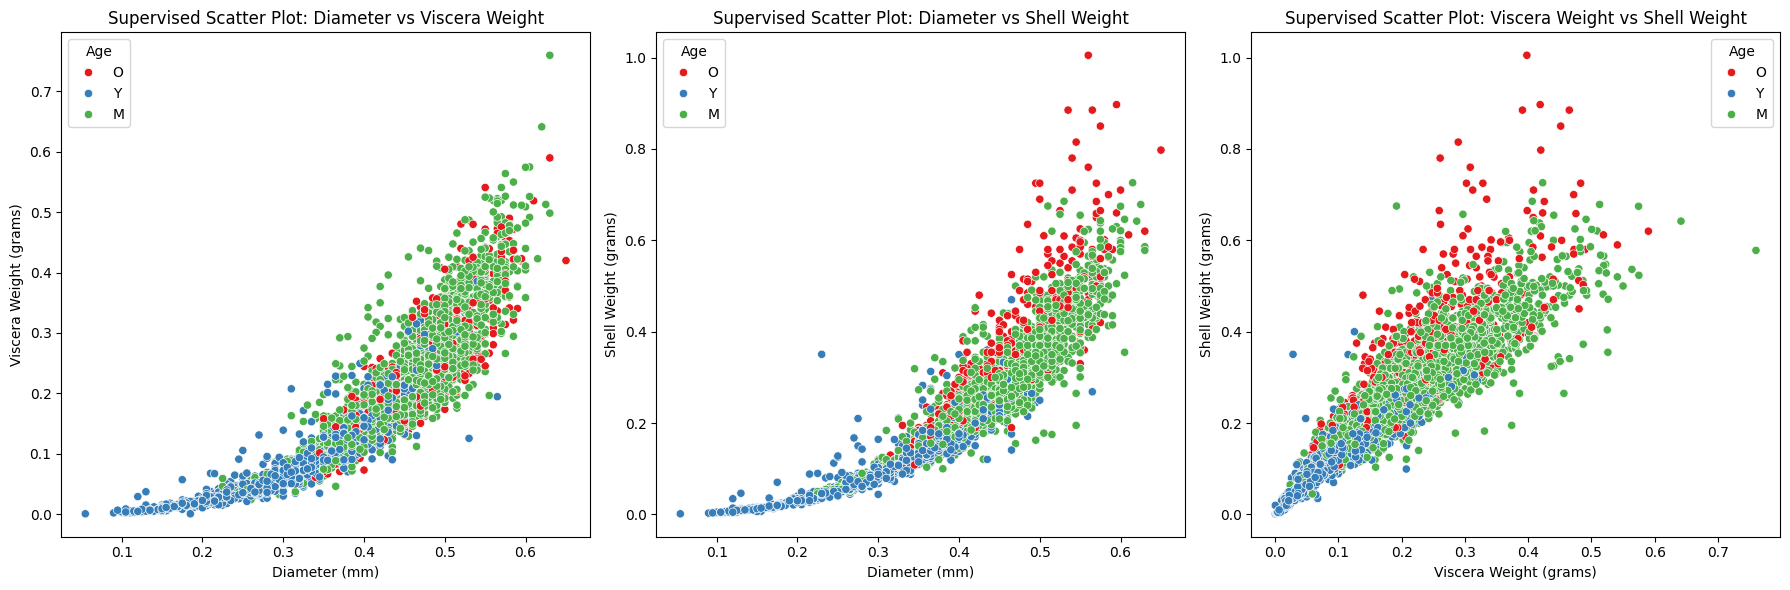

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the YAbalone dataset with the path
file_path = 'YAbalone.csv' # Current directory
abalone_data = pd.read_csv(file_path)

plt.figure(figsize=(18, 6))

# Diameter vs Viscera Weight
plt.subplot(1, 3, 1)
sns.scatterplot(x='Diameter', y='Viscera_weight', hue='Age', data=abalone_data, palette="Set1")
plt.title('Supervised Scatter Plot: Diameter vs Viscera Weight')
plt.xlabel('Diameter (mm)')
plt.ylabel('Viscera Weight (grams)')

# Diameter vs Shell Weight
plt.subplot(1, 3, 2)
sns.scatterplot(x='Diameter', y='Shell_weight', hue='Age', data=abalone_data, palette="Set1")
plt.title('Supervised Scatter Plot: Diameter vs Shell Weight')
plt.xlabel('Diameter (mm)')
plt.ylabel('Shell Weight (grams)')

# Viscera Weight vs Shell Weight
plt.subplot(1, 3, 3)
sns.scatterplot(x='Viscera_weight', y='Shell_weight', hue='Age', data=abalone_data, palette="Set1")
plt.title('Supervised Scatter Plot: Viscera Weight vs Shell Weight')
plt.xlabel('Viscera Weight (grams)')
plt.ylabel('Shell Weight (grams)')

plt.tight_layout()
plt.show()


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# Load the YAbalone dataset with the path
file_path = 'YAbalone.csv' # Current directory
abalone_data = pd.read_csv(file_path)

# Creating a new dataset ZAbalone by transforming the 7 continuous attributes into z-scores
continuous_attributes = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
scaler = StandardScaler()
ZAbalone = abalone_data.copy()
ZAbalone[continuous_attributes] = scaler.fit_transform(ZAbalone[continuous_attributes])

# A linear model to predict Rings using the z-scored continuous attributes
X = ZAbalone[continuous_attributes]
y = ZAbalone['Rings']

# Using Linear Regression model
linear_model = LinearRegression()

# Fit the model to created ZAbalone dataset
linear_model.fit(X, y)

# Predict Rings and report R^2 and coefficients
y_pred = linear_model.predict(X)
r2 = r2_score(y, y_pred)  # R^2 value of the linear model
coefficients = linear_model.coef_  # Coefficients of the linear model

# R^2 and coefficients for each z-scored attribute
print(f"R²: {r2}")
print("Coefficients for each z-scored attribute:")
for attribute, coef in zip(continuous_attributes, coefficients):
    print(f"{attribute}: {coef}")


R²: 0.5276299399919837
Coefficients for each z-scored attribute:
Length: -0.18875113591310885
Diameter: 1.325776804055256
Height: 0.49459058854591464
Whole_weight: 4.534287624944633
Shucked_weight: -4.486202673243574
Viscera_weight: -1.0773435236492896
Shell_weight: 1.1936929241792984
